### Problem Statement
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/USER/Downloads/aerofit_treadmill.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.shape

(180, 9)

In [6]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### 1. We can see that there are 3 products in Dataset and most purchased product is KP281
### 2. No missing valus present in Dataset
### 3. Out of 180, 107 are partnered and 104 are males. So partnered persons and males are purschasing more treadmills.
### 4. Here in the describe, we can see that miles and income have very high std deviation and significant difference in mean and median so they might have outliers.

## Outlier Detection

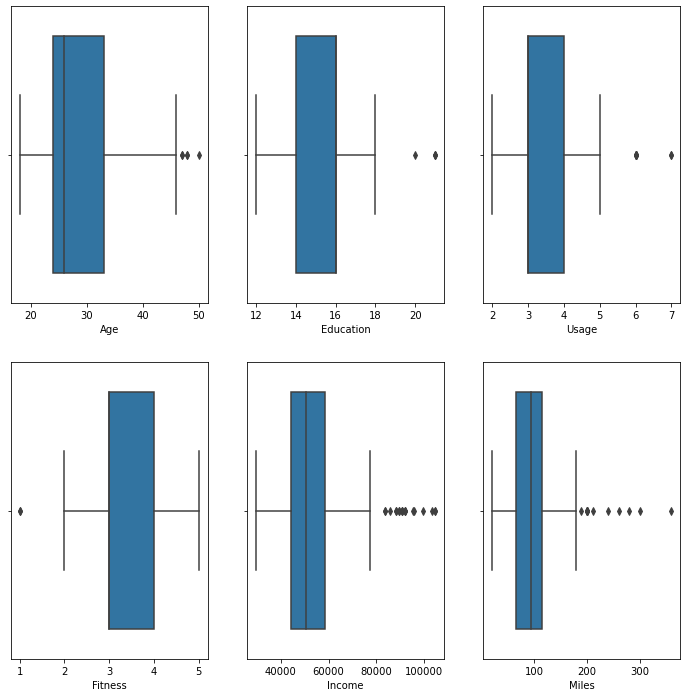

In [9]:
Fig, Axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,12))
col = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
k = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x = col[k],  ax=Axes[i,j])
        k += 1
plt.show()

### We can see that Income and miles have many outliers but age, education, usage & fitness have few outliers 

## Numerical and Visual Analysis

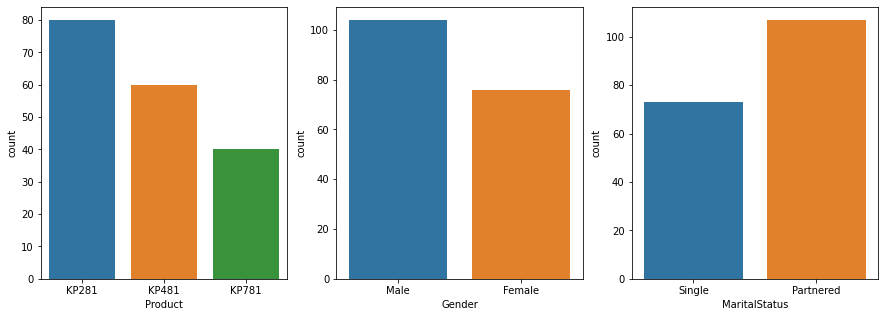

In [10]:
Fig, Axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
lis = ['Product', 'Gender', 'MaritalStatus']
for i in range(3):
    sns.countplot(data=df, x= lis[i], ax=Axes[i])
plt.show()

### We can see KP281 is most purchased product. Males are buying more treadmills than females. Partnered persons are purchasing more treadmills than singles.

In [11]:
for i in col:
    print(f'For {i} the frequency is:')
    print(df[i].value_counts().head())
    print('*'*50)

For Age the frequency is:
25    25
23    18
24    12
26    12
28     9
Name: Age, dtype: int64
**************************************************
For Education the frequency is:
16    85
14    55
18    23
15     5
13     5
Name: Education, dtype: int64
**************************************************
For Usage the frequency is:
3    69
4    52
2    33
5    17
6     7
Name: Usage, dtype: int64
**************************************************
For Fitness the frequency is:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
**************************************************
For Income the frequency is:
45480    14
52302     9
46617     8
54576     8
53439     8
Name: Income, dtype: int64
**************************************************
For Miles the frequency is:
85    27
95    12
66    10
75    10
47     9
Name: Miles, dtype: int64
**************************************************


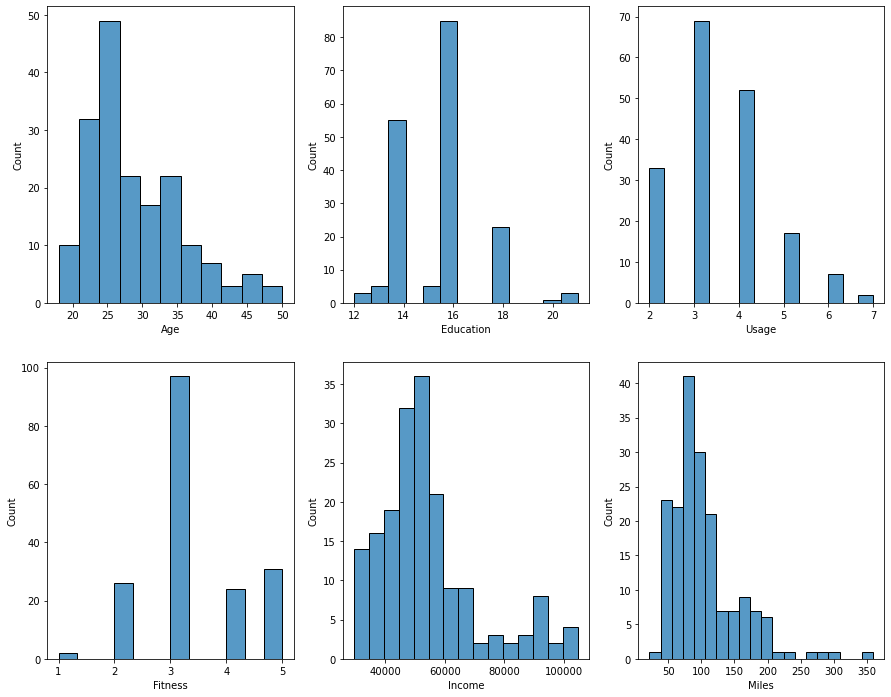

In [12]:
Fig, Axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,12))
col = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
k=0
for i in range(2):
    for j in range(3):
        sns.histplot(data=df, x=col[k],  ax=Axes[i,j])
        k +=1
plt.show()

### 1. We can see that persons having age 25 years are purchasing more treadmills than others
### 2. Those who have had 16 years of education are purchasing more treadmills
### 3. Most of the people have 3 rated fitness and are using treadmill 3 times a week
### 4. Persons having income between 40000 to 60000 are purchasing more treadmills
### 5. Most of people are walking/running 85 miles/ week

In [13]:
df.groupby('Product')['Product'].count()/len(df)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

###  We can see that 44.44% have purchased KP281 treadmill, 33.33% KP481 treadmill and 22.22% KP781 

In [14]:
pd.crosstab(df['Gender'], df['Product'], margins = True,margins_name='Total', normalize=True)

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
Total,0.444444,0.333333,0.222222,1.000000


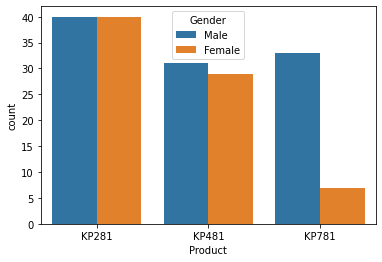

In [15]:
sns.countplot(data=df, x= 'Product', hue = 'Gender')
plt.show()

### We can see here 42.22 % customers are female and 57.78% customers are male
### We can also see that equal no of males and females have purchased KP281 treadmill

In [16]:
pd.crosstab(df['MaritalStatus'], df['Product'], margins = True,margins_name='Total', normalize=True)

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
Total,0.444444,0.333333,0.222222,1.000000


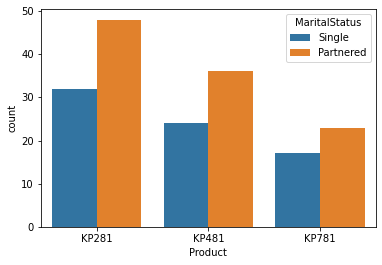

In [17]:
sns.countplot(data=df, x= 'Product', hue = 'MaritalStatus')
plt.show()

### We can see that 59.44 % customers are partnered and 40.56% customers are singles. And, Partnered customers are ahead in each product.

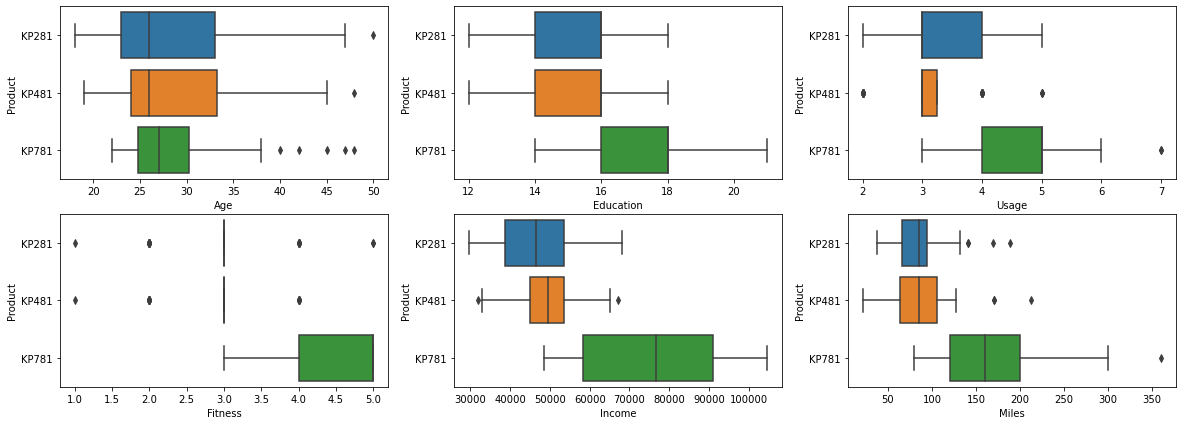

In [18]:
Fig, Axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,7))
col = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
k=0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x=col[k], y ='Product', ax=Axes[i,j])
        k +=1
plt.show()

### 1. We can see as customers with age around 25 years are more likely to buy KP281, KP481 but as age head towards 30 we see more customers are preferring KP781
### 2. Customers having education between 14-16 years are more likely to buy KP281, KP481 while those with more than 16 years of education more likely to buy KP781
### 3. Customers with higher usage per week are more likely to buy KP781
### 4. Customers with high scale in fitness are more likely to buy KP781
### 5. Customers in higher income group are more likely to buy KP781
### 6. Customers having KP781 are walking/running more miles than KP481, KP281

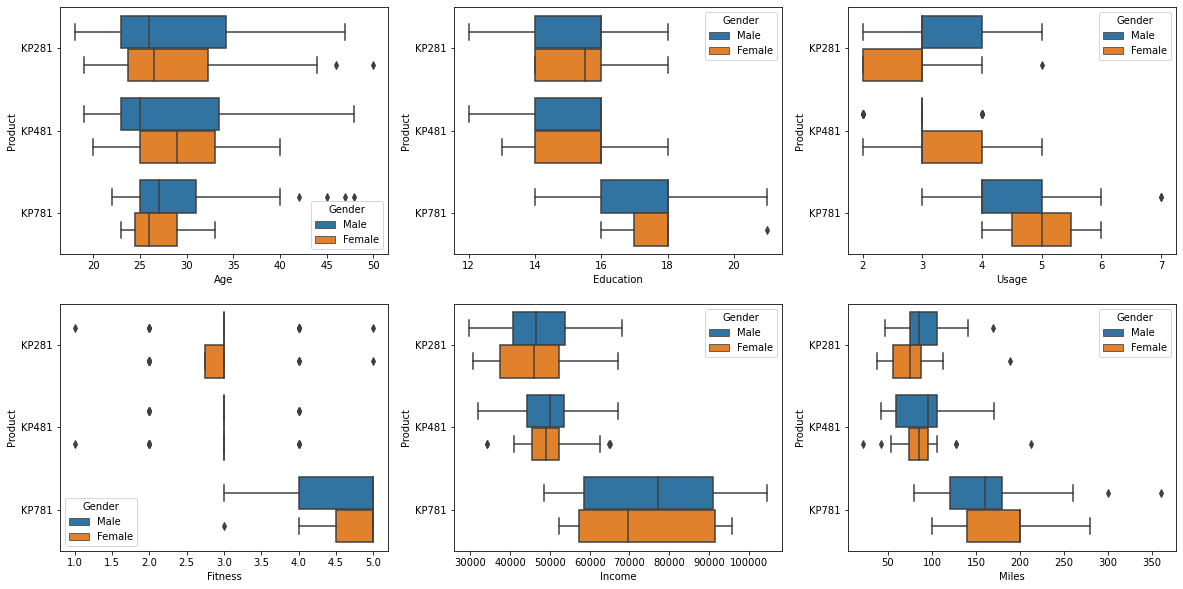

In [19]:
Fig, Axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
col = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
k=0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x=col[k], y ='Product', hue = 'Gender', ax=Axes[i,j])
        k +=1
plt.show()

### 1. Female customers having age around 30 are more likely to buy KP481
### 2. Female and male with education between 14-16 years, have almost equal chances to buy KP481
### 3. Female customers who are planning to use product 2-3 times per week, are more likely to buy KP281
### 4. Both male and female customers with high fitness and higher income are more likely to buy KP781
### 5. Both male and female customers who are planning to walk/run more, are likely to buy KP781

## Marginal Probability

In [20]:
df_g = pd.crosstab(df['Gender'], df['Product'], margins = True,margins_name='Total', normalize=True)
p_Female = round(df_g['Total']['Female'],2)
print('p(Female) = ', p_Female) 
p_Male = round(df_g['Total']['Male'],2)
print('p(Male) = ', p_Male )

p(Female) =  0.42
p(Male) =  0.58


In [21]:
df_m = pd.crosstab(df['MaritalStatus'], df['Product'], margins = True,margins_name='Total', normalize=True)
p_part = round(df_m['Total']['Partnered'],2)
print('p(Partnered) = ', p_part )
p_single = round(df_m['Total']['Single'],2)
print('p(Single) = ', p_single)

p(Partnered) =  0.59
p(Single) =  0.41


In [22]:
df.groupby('Product')['Product'].count()/len(df)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

## Conditional Probability

In [23]:
lis = ['KP281', 'KP481', 'KP781']
for i in lis:
    print(f'p({i}/Female) = ', round(df_g[i]['Female']/p_Female,2))
    print(f'p({i}/Male) = ', round(df_g[i]['Male']/p_Male,2))
    print('\n')
print('*'*50)
print('\n')
for i in lis:
    print(f'p({i}/Partnered) = ', round(df_m[i]['Partnered']/p_part,2))
    print(f'p({i}/Single) = ', round(df_m[i]['Single']/p_single,2))
    print('\n')

p(KP281/Female) =  0.53
p(KP281/Male) =  0.38


p(KP481/Female) =  0.38
p(KP481/Male) =  0.3


p(KP781/Female) =  0.09
p(KP781/Male) =  0.32


**************************************************


p(KP281/Partnered) =  0.45
p(KP281/Single) =  0.43


p(KP481/Partnered) =  0.34
p(KP481/Single) =  0.33


p(KP781/Partnered) =  0.22
p(KP781/Single) =  0.23


